# Preliminary Data exploration

Load dataset with all metadata and pre-processing steps.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np
df = pd.read_csv("../Materials/KVO_META.csv", encoding='Latin-1', index_col=False)
df['Genre'] = df['genre'].str.lower()
sns.set_palette("Set2")

In [3]:
#remove all trailing and leading whitespaces.
for column in df.columns:
    try:
        df[column] = df[column].str.strip()
    except AttributeError:
        continue

In [4]:
#convert the date column to datetime.
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

## TOP 10
### Productions


<AxesSubplot:>

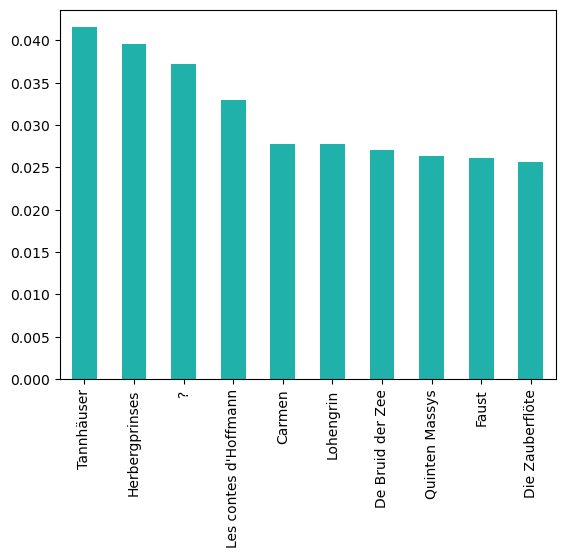

In [5]:
df['Original title'].value_counts(normalize=True).head(10).plot(kind='bar', color = 'lightseagreen')
#top 10 meest most performed productions (normalised)


### All composers

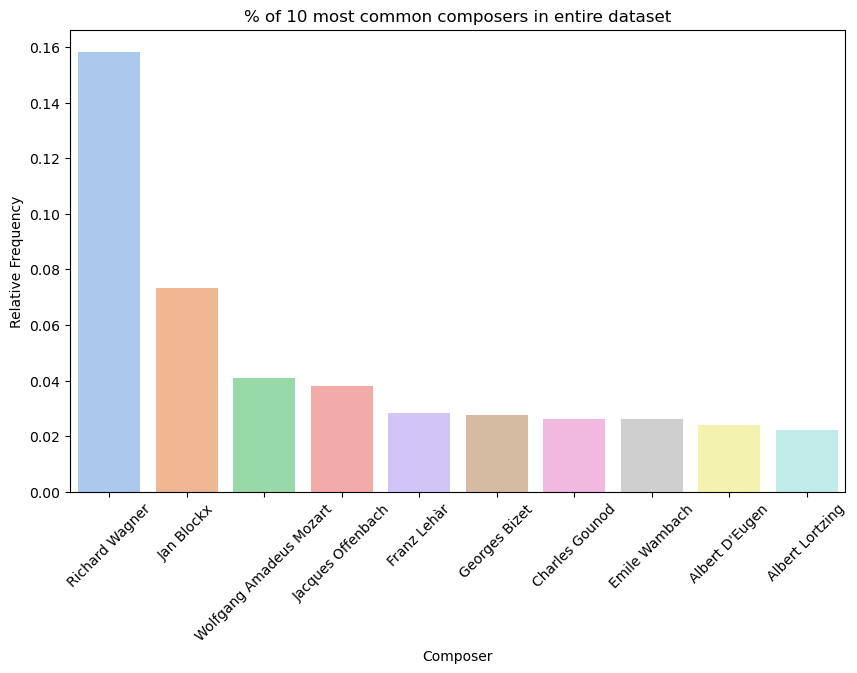

In [6]:
comp = df['Composer'].value_counts(normalize=True).head(10)
plt.figure(figsize=(10,6))
ax = sns.barplot(x=comp.index, y=comp.values, palette='pastel')
plt.title('% of 10 most common composers in entire dataset')
plt.xlabel('Composer')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=45)
plt.show()

### Dutch Composers

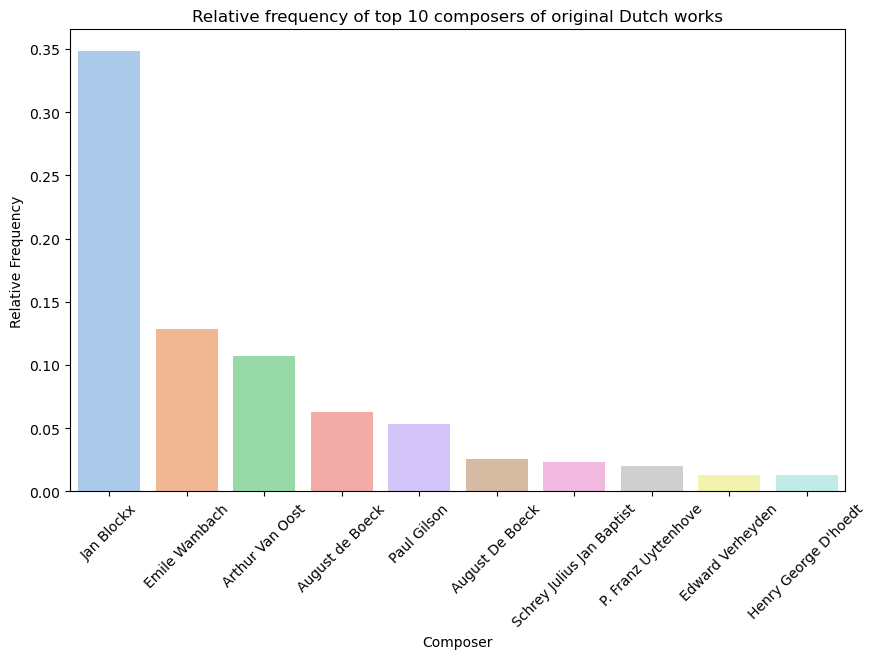

In [7]:
df2 = df[df["Original language"] == 'NL']
#isolate all Dutch productions

nl = df2['Composer'].value_counts(normalize=True).head(10)
plt.figure(figsize=(10,6))
ax = sns.barplot(x=nl.index, y=nl.values, palette='pastel')
plt.title('Relative frequency of top 10 composers of original Dutch works')
plt.xlabel('Composer')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=45)
plt.show()



## Distribution of Wagner productions

In [10]:
#create a subdataset with all Wagner performances
wag = df[df['Composer'] == 'Richard Wagner']
DUI = df[df['Original language'] == 'DUI']

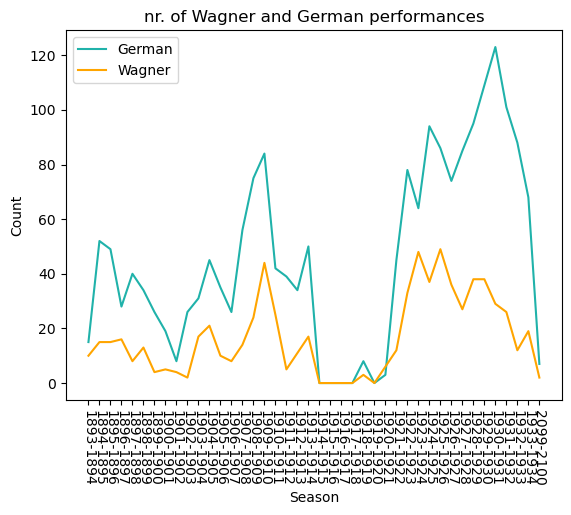

In [11]:
fig, ax = plt.subplots()

#create 2 series: one for all German performances and one for only the wagner performances
counts1 = DUI['Season'].value_counts().sort_index(axis=0)
counts2 = wag['Season'].value_counts().sort_index(axis=0)

# Adding a row for the missing season with a value of zero
counts2.loc['1914-1915'] = 0
counts2.loc['1915-1916'] = 0
counts2.loc['1916-1917'] = 0
counts2.loc['1917-1918'] = 0
counts2.loc['1919-1920'] = 0

#sort the index so that the seasons occur chronologically on the plot.
counts2 = counts2.sort_index()

#do the same for the other series
counts1.loc['1914-1915'] = 0
counts1.loc['1915-1916'] = 0
counts1.loc['1916-1917'] = 0
counts1.loc['1917-1918'] = 0
counts1.loc['1919-1920'] = 0

counts1 = counts1.sort_index()

# Generate x and y data for the line plot, otherwise it doesn't plot all the index labels
x = counts1.index
y = counts1.values

x2 = counts2.index
y2 = counts2.values

#we make a lineplot
ax.plot(x, y, color='lightseagreen', label='German')
ax.plot(x2, y2, color = 'orange', label = 'Wagner')

ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=-90)

ax.set_xlabel('Season')
ax.set_ylabel('Count')
ax.legend()
ax.set_title('nr. of Wagner and German performances')

plt.show()

## Normalised distribution of composers

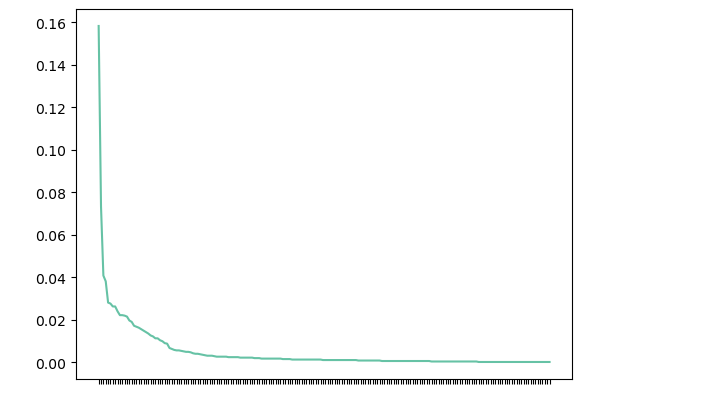

In [12]:
import warnings
warnings.filterwarnings("ignore")
comp_dis = df['Composer'].value_counts(normalize=True)
plt.plot(comp_dis)
plt.xticks(color='white')
plt.show()

### Original premiere -> first occurence in Antwerp Opera
How long does it take (on average) for a work to be performed in Antwerp after it had its original premiere. <br>
<i>In some cases the difference in years between world premiere and first performance in antwerp will be 0 since some works had their world premiere in Antwerp

In [13]:
eerste_voorkomen = []
for item in df.groupby('Original title')['Date'].min():
    eerste_voorkomen.append(item)


premiere = []
for item in df.groupby('Original title')['Original premiere'].min():
    premiere.append(item)


premiere = pd.to_datetime(pd.Series(premiere), dayfirst=True, errors='coerce');
eerste_voorkomen = pd.to_datetime(pd.Series(eerste_voorkomen), dayfirst=True, errors='coerce');

print(len(eerste_voorkomen) == len(premiere))


True


In [14]:
result = []
x = dict(zip(premiere, eerste_voorkomen))
for key, value in x.items():
    try:
        result.append(int(value.year) - int(key.year))
    except ValueError:
        continue
    

In [15]:
#On average, the Antwerp Opera presents a work approximately 40 years after its initial performance.
print(round(np.array(result).mean(), 2))


39.58


In [17]:
df.columns

Index(['Image', 'Collection', 'Production', 'Date', 'Occasion',
       'Multiple bill', 'Performances_ID', 'Normalised title',
       'Original language', 'Composer', 'Original premiere', 'Original title',
       'genre', 'Season', 'Directors', 'Genre'],
      dtype='object')

In [19]:
for index, row in df.iterrows():
    if row['Multiple bill'] and pd.notnull(row['Occasion']):
        print(row['Image'])

K.V.O. programmas 1893-97_00215-20211201_121653.jpg
K.V.O. programmas 1893-97_00215-20211201_121653.jpg
K.V.O. programmas 1893-97_00215-20211201_121653.jpg
K.V.O. programmas 1893-97_00261-20211201_122640.jpg
K.V.O. programmas 1893-97_00261-20211201_122640.jpg
1897-1900 Nederlandsch Lyrisch Tooneel. Programma's_00066-20211201_144100.jpg
1897-1900 Nederlandsch Lyrisch Tooneel. Programma's_00066-20211201_144100.jpg
1897-1900 Nederlandsch Lyrisch Tooneel. Programma's_00161-20211201_150125.jpg
1897-1900 Nederlandsch Lyrisch Tooneel. Programma's_00161-20211201_150125.jpg
1897-1900 Nederlandsch Lyrisch Tooneel. Programma's_00207-20211201_151015.jpg
1897-1900 Nederlandsch Lyrisch Tooneel. Programma's_00207-20211201_151015.jpg
1897-1900 Nederlandsch Lyrisch Tooneel. Programma's_00207-20211201_151015.jpg
1897-1900 Nederlandsch Lyrisch Tooneel. Programma's_00351-20211201_153317.jpg
1897-1900 Nederlandsch Lyrisch Tooneel. Programma's_00351-20211201_153317.jpg
1900-1901 nederlandsch Lyrisch Tooneel